In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score , log_loss
from tqdm import tqdm

(2, 100)
(1, 100)


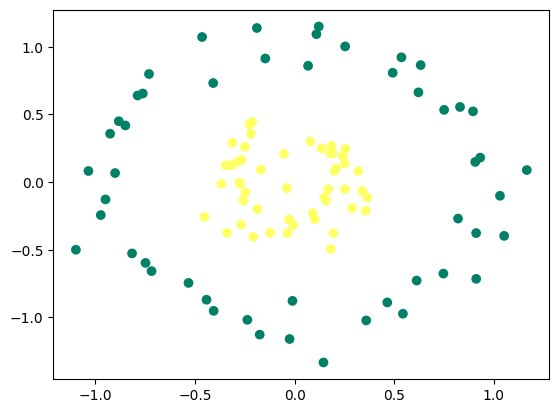

In [2]:
X , y = make_circles(n_samples = 100 , noise = 0.1 , factor = 0.3 , random_state = 0)
X = X.T
y = y.reshape((1 , y.shape[0]))

print(X.shape)
print(y.shape)

plt.scatter(X[0 , :] , X[1 , :] , c = y , cmap = 'summer')
plt.show()

In [3]:
#Initialisation
def initialisation(dim):

    params = {}

    C = len(dim)
    
    for c in range(1 , C):
        params['W' + str(c)] = np.random.randn(dim[c] , dim[c - 1])
        params['b' + str(c)] = np.random.randn(dim[c] , 1)

    return params

In [4]:
#Test
params = initialisation([2 , 12 , 12 , 8])

for key , val in params.items():
    print(key , val.shape)

W1 (12, 2)
b1 (12, 1)
W2 (12, 12)
b2 (12, 1)
W3 (8, 12)
b3 (8, 1)


In [5]:
#Forward propagation
def forward_propagation(X , params):
    
    act = {'A0' : X}

    C = len(params) // 2 #Double parametres

    for c in range(1 , C + 1): #Function range
        Z = params['W' + str(c)].dot(act['A' + str(c - 1)])  + params['b' +str(c)]
        act['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return act

In [6]:
#Test
act = forward_propagation(X , params)

for key , val in act.items():
    print(key , val.shape)

A0 (2, 100)
A1 (12, 100)
A2 (12, 100)
A3 (8, 100)


In [7]:
#Back-propagation
def back_propagation(y , act , params):
    
    m = y.shape[1]
    C = len(params) // 2
    
    dZ = act['A' + str(C)] - y
    grad = {}

    for c in reversed(range(1 , C + 1)):
        grad['dW' + str(c)] = 1 / m * dZ.dot(act['A' + str(c -1)].T)
        grad['db' + str(c)] = 1 / m * np.sum(dZ , axis = 1 , keepdims = True)
        if c > 1: 
            dZ = params['W' + str(c)].T.dot(dZ) * act['A' + str(c - 1)] * (1 - act['A' + str(c - 1)])

    return grad

In [8]:
#Test
grad = back_propagation(y , act , params)

for key , val in grad.items():
    print(key , val.shape)

dW3 (8, 12)
db3 (8, 1)
dW2 (12, 12)
db2 (12, 1)
dW1 (12, 2)
db1 (12, 1)


In [9]:
#Update
def update(grad , params , learning_rate):

    C = len(params) // 2

    for c in range(1 , C + 1):
        params['W' + str(c)] = params['W' + str(c)] - learning_rate * grad['dW' + str(c)]
        params['b' + str(c)] = params['b' + str(c)] - learning_rate * grad['db' + str(c)]

    return params

In [10]:
#Prediction
def predict(X , params):
    act = forward_propagation(X , params)
    C = len(params) // 2
    Af = act['A' + str(C)]
    return Af >= 0.5

In [11]:
#Neural Network
def neural_network(X , y , hidden_layers , learning_rate , n_iter):

    np.random.seed(0)
    #Initialisation
    dim = list(hidden_layers) 
    dim.insert(0 , X.shape[0])  #Ajout des dimensions au debut
    dim.append(y.shape[0]) #Ajout des dimensions à la fin
    params = initialisation(dim)

    train_loss = []
    train_acc = []

    for i in range(n_iter):
        
        act = forward_propagation(X , params)
        grad = back_propagation(y , act , params)
        params = update(grad , params , learning_rate)

        if i%10 == 0:
            C = len(params) // 2
            Af = act['A' + str(C)]
            train_loss.append(log_loss(y , Af))
            y_pred = predict(X , params)
            current_accuracy = accuracy_score(y.flatten() , y_pred.flatten())
            train_acc.append(current_accuracy)
    
    plt.figure(figsize = (14 , 4))

    plt.subplot(1 , 2 , 1)
    plt.plot(train_loss , label = 'Train Loss')
    plt.legend()

    plt.subplot(1 , 2 , 2)
    plt.plot(train_acc , label = 'Train Acc')
    plt.legend()

    plt.show()

    return params

/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/yvanfai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an

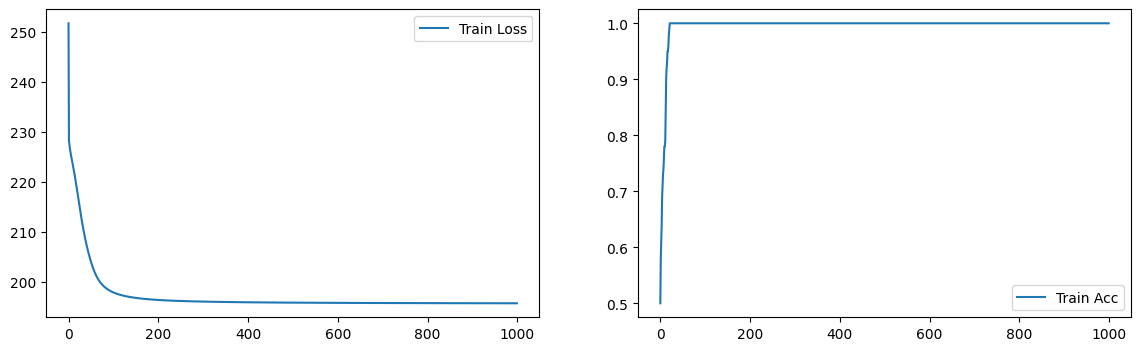

In [12]:
params = neural_network(X , y , hidden_layers = (32 , 32 , 32) , learning_rate = 0.1 , n_iter = 10000)